# Tasca M4 T02

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercici 2

In [3]:
# Una forma de llegir el fitxer com a taula
file = "https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat"
movie_column = ['id', 'title/year', 'genres']
movies = pd.read_table(file, sep='::',encoding = 'ISO-8859-1', header=None, names=movie_column, engine='python', index_col=0)

In [2]:
## Una altra forma de llegir el fitxer com a taula

movies = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat",
sep='::', encoding = 'ISO-8859-1', index_col=0, names=['title/year','genres'], engine='python')

In [26]:
movies.head()

,title/year,genres
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title/year  3883 non-null   object
 1   genres      3883 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


In [4]:
# Fer una ullada a la columna genres
movies['genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [7]:
#num de categorìes uniques de la columna genres
movies['genres'].nunique()

301

In [27]:
# Mirar si hi ha nulls abans de separar per a que no hi hagi errors posteriors
movies.isnull().sum()

title/year    0
genres        0
dtype: int64

In [80]:
# 1era maenera de separar la columna title/year. Surt bé, però té més passes a fer que la segona que he provat. Aquesta manera no funciona bé
# Però he vist que no funciona bé i dona molts error. Millor la segona forma
movies[['titol','any']]=movies['title/year'].str.split('(', n=1, expand=True) #separa, però queda el parentisis posterior
movies['any']=movies['any'].apply(lambda x: x.replace(')','')) #elimino el parentesis posterior

movies.head()

,title/year,genres,titol,any
id,,,,
1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [4]:
# 2ona manera de separar columna title/year. Via REGEX
pattern="(?P<titol>.*)(?:\s\()(?P<any>[\d]{4})" #patró per extreure la informació
names=movies['title/year'].str.extract(pattern)                  
movies['titol']=names['titol'] #També es por fer eliminant aquests dos pasos i extraient directament a la matriu movies
movies['any']=names['any']                       


In [36]:
#Mirar que tot hagi funcionat bé. Veig que hi ha un nul, que no s'ha separat bé

movies.isnull().sum()

title/year    0
genres        0
titol         1
any           1
dtype: int64

In [38]:
movies_null=movies[movies.titol.isnull()] #Per mirar que ha passat amb el nul
movies_null

,title/year,genres,titol,any
id,,,,
1001,"Associate, The (L'Associe)(1982)",Comedy,NaN,NaN


In [5]:
#Com només hi ha un, la millor manera es canviar manual
movies.loc[1001,'titol']="Associate, The (L'Associe)"
movies.at[1001,'any']=1982
movies.isnull().sum()

title/year    0
genres        0
titol         0
any           0
dtype: int64

In [6]:
#Per separar la columna generes
movieg=movies['genres'].str.split('|', expand=True)
movieg

,0,1,2,3,4,5
id,,,,,,
1,Animation,Children's,Comedy,None,None,None
2,Adventure,Children's,Fantasy,None,None,None
3,Comedy,Romance,None,None,None,None
4,Comedy,Drama,None,None,None,None
5,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3948,Comedy,None,None,None,None,None
3949,Drama,None,None,None,None,None
3950,Drama,None,None,None,None,None


In [31]:
# Mirar nuls de la nova dataframe. Agafo la primera columna que està complerta
movieg.isnull().sum()

0       0
1    2025
2    3347
3    3768
4    3868
5    3882
dtype: int64

In [7]:
# S'incorpora la primera columna a la matriu original i trec les columnes originals
movies['genere']=movieg[0]
movies.drop(columns=['title/year','genres'], inplace=True)
movies.head()

,titol,any,genere
id,,,
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy


In [62]:
movies.genere.nunique()

18

In [84]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titol   3883 non-null   object
 1   any     3883 non-null   object
 2   genere  3883 non-null   object
dtypes: object(3)
memory usage: 250.4+ KB


In [68]:
#Per canviar l'any a datatime. En aquest cas no m'interesa
movies['any']= pd.to_datetime(movietest['any'])

In [33]:
# Per canviar d'objet a numeric. Ha funcionat molt be
movies['any'] = pd.to_numeric(movies['any'],errors='coerce')

In [34]:
movies.isnull().sum()

titol     0
any       0
genere    0
dtype: int64

## Exercici 3

#### Crec que l'important a mostrar del dataset es l'evolució del número de pelicules fetes al llarg dels anys i també veure com ha anat canviant el tipus de gèneres produits.
#### El primer gràfic mostra l'evolució de la quantitat de películes, però al haver tants gèneres. He provat de fer-ho per gènere, però queda molt confús per l'alt nombre de gèneres

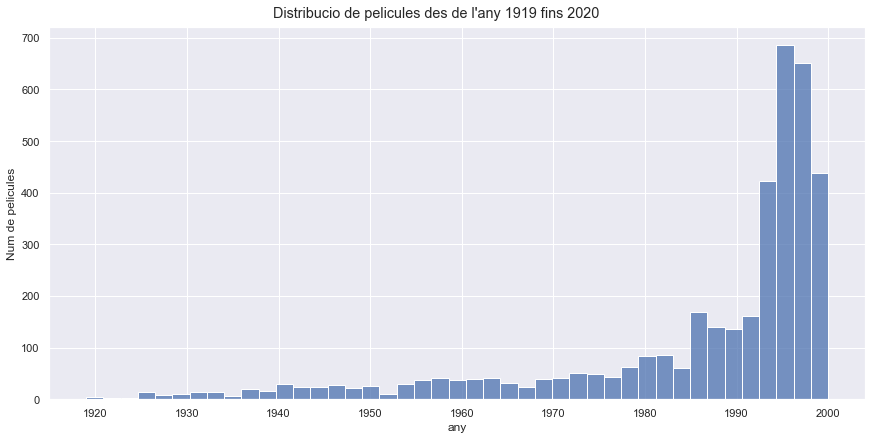

In [44]:
fig,ax=plt.subplots(figsize=(12,6), layout='constrained')
g=sns.histplot(data=movies,x='any')
g.set_ylabel('Num de pelicules')
g.figure.suptitle("Distribucio de pelicules des de l'any 1919 fins 2020")
plt.show()

#### Crec que el millor per mostrar l'evolució de la quantiatat de pelicutles per gènere és amb aquest gràfic de categories

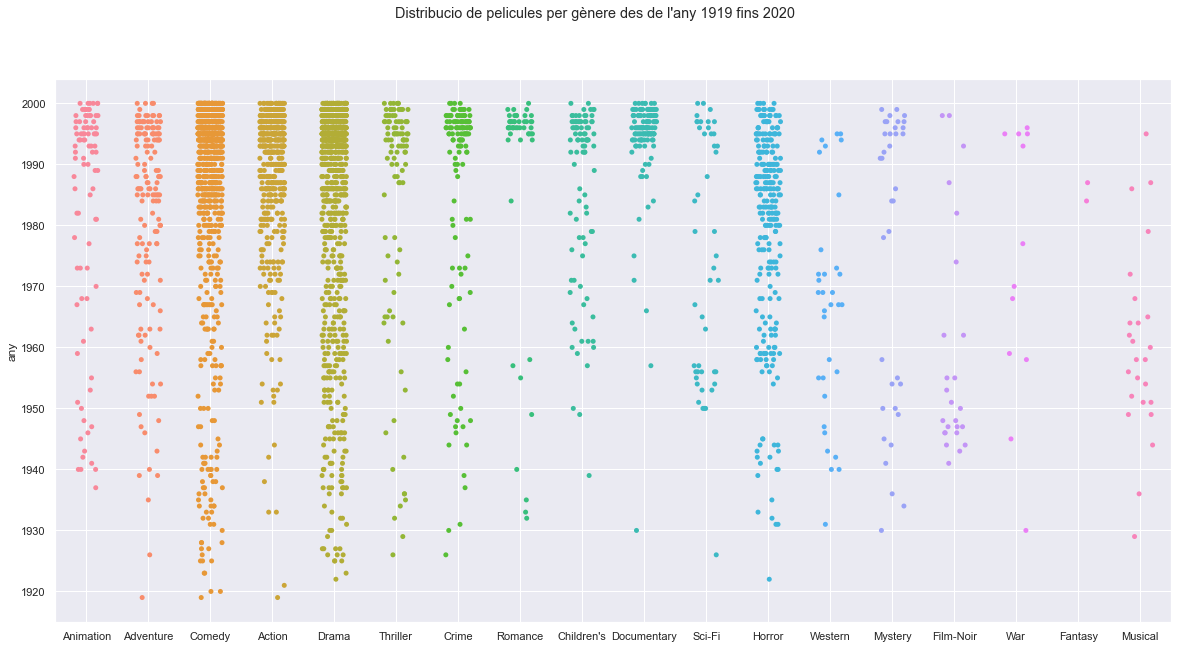

In [38]:
g= sns.stripplot(data=movietest, x='genere', y='any',jitter=0.2)
g.figure.set_size_inches(20,10)
g.figure.suptitle("Distribucio de pelicules per gènere des de l'any 1919 fins 2020")
g.set(xlabel=None)
g.grid(True)
plt.show()
